In [14]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import shutil
from sklearn.model_selection import train_test_split
import cv2 as cv
import numpy as np
from tensorflow.keras.models import load_model


In [3]:
ListeComposantPC = []

proportion_train = 0.8
donnees = []
etiquettes = []


In [4]:
for element in os.listdir("pc_parts"):
    chemin_element = os.path.join("pc_parts", element)
    if os.path.isdir(chemin_element):
        ListeComposantPC.append(element)

In [ ]:
print(ListeComposantPC)

In [5]:

for idx, composant in enumerate(ListeComposantPC):
    chemin_composant = os.path.join("pc_parts", composant)
    fichiers = [f for f in os.listdir(chemin_composant) if os.path.isfile(os.path.join(chemin_composant, f))]

    for fichier in fichiers:
        img_path = os.path.join(chemin_composant, fichier)
        img = cv.imread(img_path)
        if img is not None:
            img = cv.resize(img, (256, 256))  # Assurer la dimension attendue par le modèle
            donnees.append(img) 
            etiquettes.append(idx)



In [6]:
donnees = np.array(donnees)
etiquettes = np.array(etiquettes)
X_train, X_test, Y_train, Y_test = train_test_split(donnees, etiquettes, test_size=1-proportion_train, random_state=42)

print(f"Données d'entraînement : {X_train.shape}, Étiquettes d'entraînement : {Y_train.shape}")
print(f"Données de test : {X_test.shape}, Étiquettes de test : {Y_test.shape}")
X_train, X_test = X_train / 255.0, X_test / 255.0


Données d'entraînement : (2623, 256, 256, 3), Étiquettes d'entraînement : (2623,)
Données de test : (656, 256, 256, 3), Étiquettes de test : (656,)


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(ListeComposantPC))  # Ajustement ici pour correspondre au nombre réel de classes
])

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [9]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
82/82 [==============================] - 122s 1s/step - loss: 3.0103 - accuracy: 0.0850 - val_loss: 2.5672 - val_accuracy: 0.1296
Epoch 2/10
82/82 [==============================] - 113s 1s/step - loss: 2.4523 - accuracy: 0.1998 - val_loss: 2.3603 - val_accuracy: 0.2287
Epoch 3/10
82/82 [==============================] - 119s 1s/step - loss: 2.0174 - accuracy: 0.3561 - val_loss: 2.3811 - val_accuracy: 0.2317
Epoch 4/10
82/82 [==============================] - 117s 1s/step - loss: 1.2552 - accuracy: 0.6264 - val_loss: 2.7347 - val_accuracy: 0.2729
Epoch 5/10
82/82 [==============================] - 116s 1s/step - loss: 0.7491 - accuracy: 0.8021 - val_loss: 3.5744 - val_accuracy: 0.2866
Epoch 6/10
82/82 [==============================] - 119s 1s/step - loss: 0.5320 - accuracy: 0.8917 - val_loss: 3.6913 - val_accuracy: 0.2805
Epoch 7/10
82/82 [==============================] - 116s 1s/step - loss: 0.3928 - accuracy: 0.9234 - val_loss: 3.4886 - val_accuracy: 0.2973
Epoch 8/10
82

In [13]:
model.save('detecPc.h5')  # Enregistre le modèle dans un fichier HDF5

c:\Users\trist\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
def AfficherImage(cheminImage):
    img = mpimg.imread(cheminImage)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [26]:
def AfficherImageRandom():
    PCpartie = random.choice(ListeComposantPC)
    chemin_PCpartie = os.path.join("pc_parts", PCpartie)
    fichiers = os.listdir(chemin_PCpartie)
    image_random = random.choice(fichiers)
    chemin_image = os.path.join(chemin_PCpartie, image_random)
    AfficherImage(chemin_image)
    return chemin_image, PCpartie  # Retourner aussi le label de la classe


In [27]:
def preparer_et_predire(chemin_image, model):
    img = cv.imread(chemin_image)  
    img = cv.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)  
    predicted_class = np.argmax(prediction)
    return predicted_class

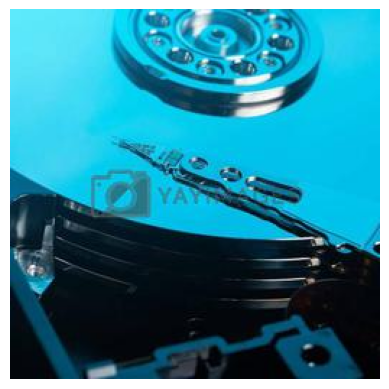

1/1 [==============================] - 0s 118ms/step
Classe réelle : hdd
Label prédit : hdd


In [34]:
modelload = load_model('detecPc.h5')

# Obtenir une image et son label de classe réel
chemin_image, classe_reelle = AfficherImageRandom()
predicted_class = preparer_et_predire(chemin_image, modelload)

# Obtenez le label prédit à partir de l'index
predicted_label = ListeComposantPC[predicted_class]

print("Classe réelle :", classe_reelle)
print("Label prédit :", predicted_label)

In [25]:
label = ListeComposantPC[predicted_class]
print("Label prédit :", label)

Label prédit : cpu


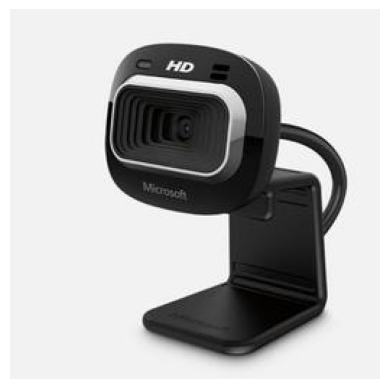

pc_parts\webcam\58.jpg


In [12]:

print(AfficherImageRandom())